# 2. Disease prediciton

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn import ensemble

In [181]:
cardio = pd.read_csv(
    r"C:\Users\kalls\Documents\GitHub\Maskininl-rning-Lukas-K-llstr-m\data_cardio\cardio_train.csv", sep=";")


# 2.0 Eda uppvärmning

In [182]:
cardio.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [183]:
cardio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### Cardio disease or no cardio disease

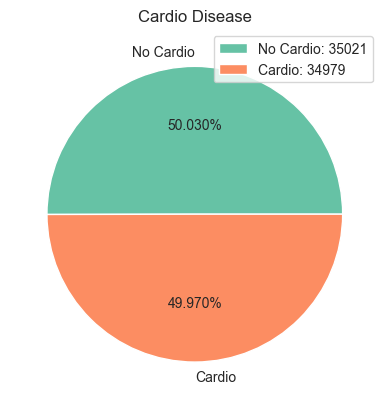

In [184]:
# pie graph how many people have cardio disease and how many don't using sns
color = sns.color_palette("Set2")
sns.set_palette(color)
sns.set_style("whitegrid")
plt.pie(cardio.cardio.value_counts(), labels=[
        "No Cardio", "Cardio"], autopct="%3.3f%%")
# add the exact number of people with and without cardio disease in the legends
plt.legend(["No Cardio: "+str(cardio.cardio.value_counts()[0]), "Cardio: "+str(cardio.cardio.value_counts()
           [1]), "Total: "+str(cardio.cardio.value_counts()[0]+cardio.cardio.value_counts()[1])])
plt.title("Cardio Disease")
plt.show()


# Cholesterol

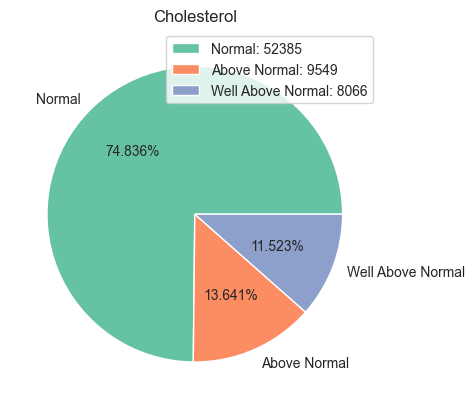

In [185]:
# pie graph how many people have normal, above normal and well above normal cholesterol using pie chart
plt.pie(cardio.cholesterol.value_counts(), labels=[
        "Normal", "Above Normal", "Well Above Normal"], autopct="%3.3f%%")
# add the exact number for each category
plt.legend(["Normal: "+str(cardio.cholesterol.value_counts()[1]),
            "Above Normal: "+str(cardio.cholesterol.value_counts()[2]),
            "Well Above Normal: "+str(cardio.cholesterol.value_counts()[3]),
            "Total: "+str(cardio.cholesterol.value_counts()[1]+cardio.cholesterol.value_counts()[2]+cardio.cholesterol.value_counts()[3])])
plt.title("Cholesterol")
plt.show()


### Age distribution

In [186]:
# convert the days to years
cardio["age_years"] = cardio["age"]/365


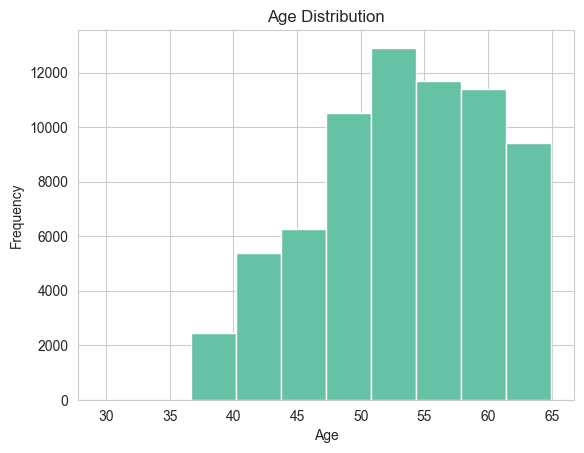

In [187]:
# plot the age distribution using a histogram
plt.hist(cardio.age_years, bins=10)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


### Smokers

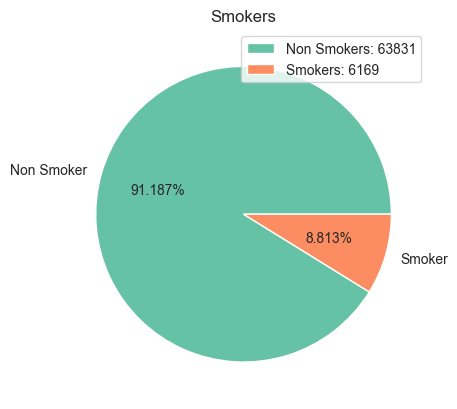

In [188]:
# plot the smokers and non smokers using pie chart
plt.pie(cardio.smoke.value_counts(), labels=[
        "Non Smoker", "Smoker"], autopct="%3.3f%%")
# add the exact number for each category
plt.legend(["Non Smokers: "+str(cardio.smoke.value_counts()[0]),
            "Smokers: "+str(cardio.smoke.value_counts()[1]),
            "Total: "+str(cardio.smoke.value_counts()[0]+cardio.smoke.value_counts()[1])])
plt.title("Smokers")
plt.show()


### Height and weight

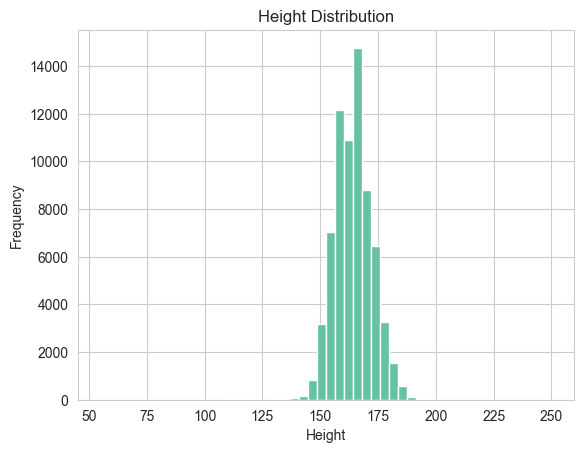

In [189]:
# plot the length
plt.hist(cardio.height, bins=50)
plt.title("Height Distribution")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.show()


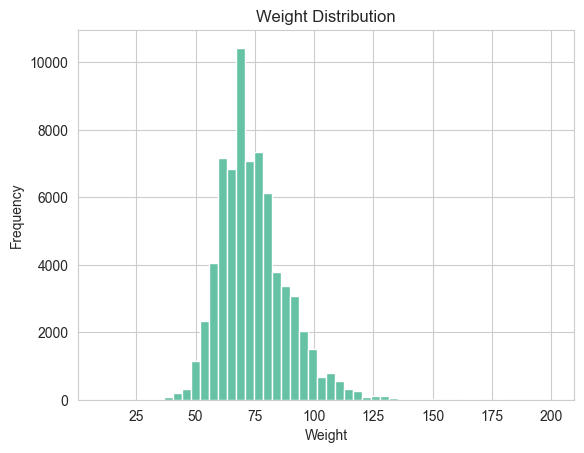

In [190]:
# plot the weight
plt.hist(cardio.weight, bins=50)
plt.title("Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()


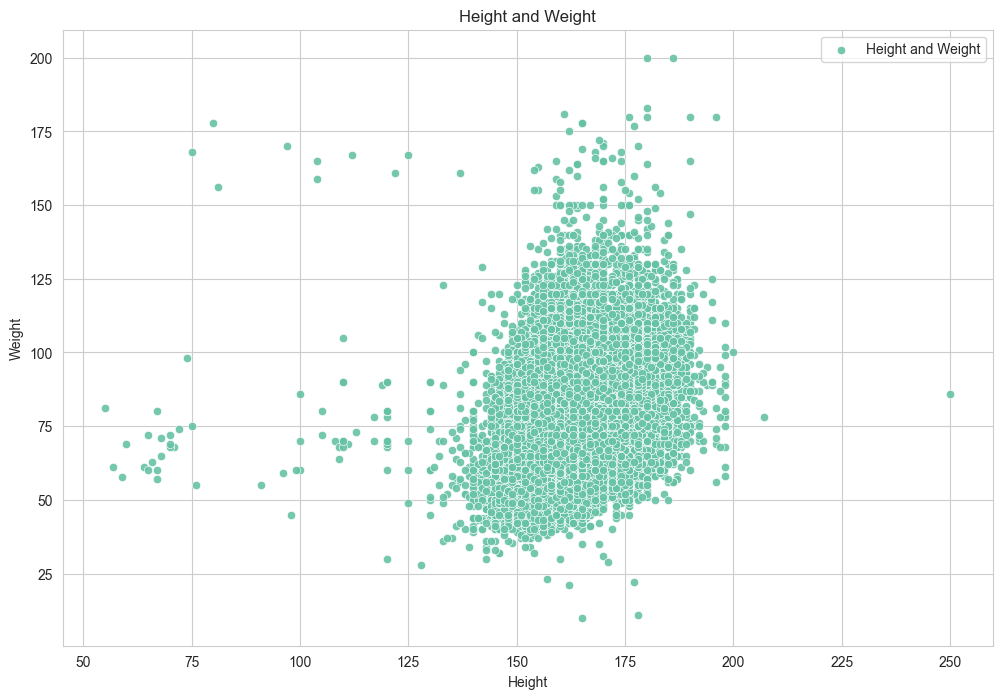

In [191]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=cardio.height, y=cardio.weight, alpha=0.9)
plt.title("Height and Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(["Height and Weight"])


### Genders

In [192]:
# people with cardio disease
cardio_yes = cardio[cardio.cardio == 1]
# people without cardio disease
cardio_no = cardio[cardio.cardio == 0]

females = [cardio_no["gender"].value_counts(
)[1], cardio_yes["gender"].value_counts()[1]]
males = [cardio_no["gender"].value_counts(
)[2], cardio_yes["gender"].value_counts()[2]]


In [193]:
# print the different cardio variables
print(f"Female not sick/ sick: {females}")
print(f"Males not sick/ sick: {males}")


Female not sick/ sick: [22914, 22616]
Males not sick/ sick: [12107, 12363]


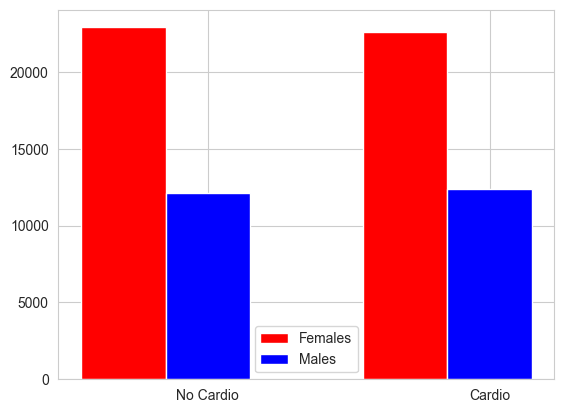

In [194]:
# create a bar chart with the different cardio variables
n = 2
r = np.arange(n)
width = 0.3
plt.bar(r, females, color="red", width=width)
plt.bar(r + width, males, color="blue", width=width)
# add the text for the different variables
plt.legend(["Females", "Males"])
plt.xticks([r + width for r in range(n)], ["No Cardio", "Cardio"])
plt.show()


In [195]:
# create a new column in the dataframe with the bmi
cardio["bmi"] = cardio["weight"]/((cardio["height"]/100)**2)


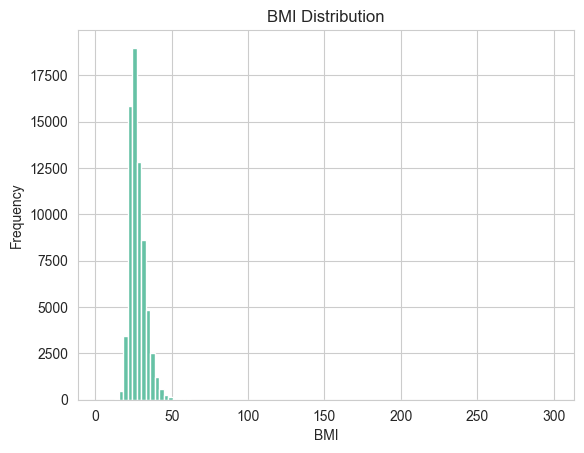

In [196]:
# plot the different bmi values
plt.hist(cardio.bmi, bins=100)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()


In [197]:
# create a new column in the dataframe with the bmi classifcations 18.5-24.9 is normal, 25-29.9 is overweight and 30-34.9 is obese class 1, 35-39.9 is obese class 2 and 40+ is obese class 3
cardio["bmi_class"] = np.where(cardio.bmi < 18.5, "Underweight", np.where(cardio.bmi < 24.9, "Normal", np.where(
    cardio.bmi < 29.9, "Overweight", np.where(cardio.bmi < 34.9, "Obese Class 1", np.where(cardio.bmi < 39.9, "Obese Class 2", "Obese Class 3")))))


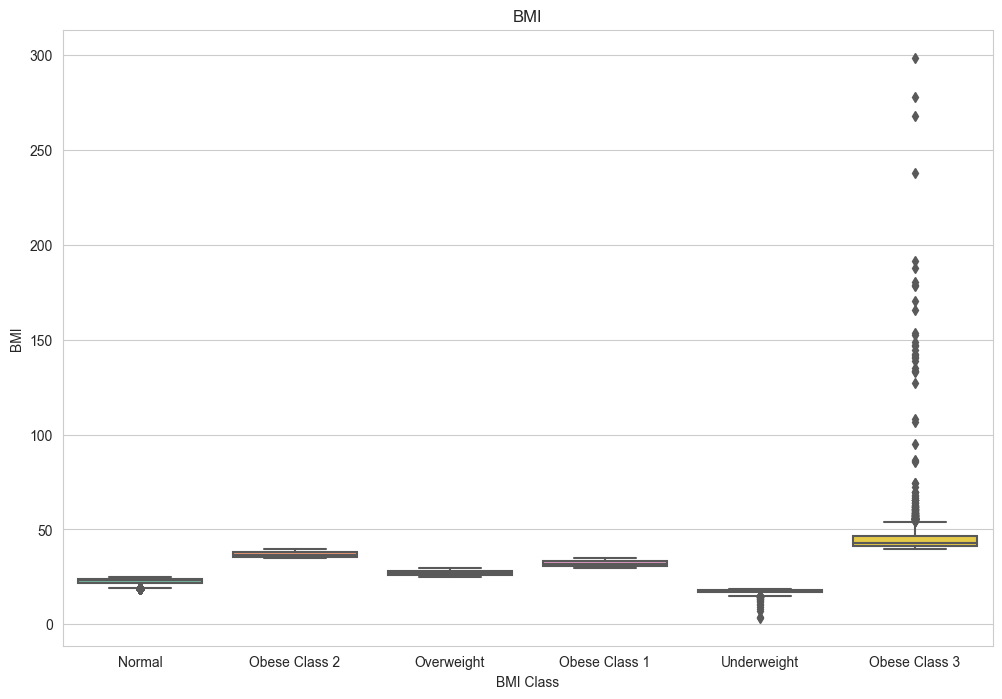

In [198]:
# box plot the bmi
plt.figure(figsize=(12, 8))
ax1 = sns.boxplot(x=cardio.bmi_class, y=cardio.bmi)
plt.title("BMI")
plt.xlabel("BMI Class")
plt.ylabel("BMI")
plt.show()


In [199]:
cardio["bmi_class"].value_counts()


Overweight       25919
Normal           24748
Obese Class 1    12285
Obese Class 2     4486
Obese Class 3     1912
Underweight        650
Name: bmi_class, dtype: int64

In [200]:
# remove the bmi values under 10 and over 60
cardio = cardio[cardio.bmi > 10]
cardio = cardio[cardio.bmi < 60]

# print the number of bmi values under 10
print(f"Number of BMI values under 10: {cardio[cardio.bmi<10].shape[0]}")
# print the number of bmi values over 60
print(f"Number of BMI values over 60: {cardio[cardio.bmi>60].shape[0]}")


Number of BMI values under 10: 0
Number of BMI values over 60: 0


In [201]:
# create a new column with the blood pressure classes normal is ap_hi less than 120 and ap_lo less than 80, elevated is ap_hi between 120 and 129 and ap_lo less than 80, Stage 1 hypertension is ap_hi between 130 and 139 or ap_lo between 80 and 89, Stage 2 hypertension is ap_hi between 140 and 180 or ap_lo between 90 and 120, hypertensive crisis is ap_hi over 180 or ap_lo over 120
cardio["blood_pressure_class"] = np.where((cardio.ap_hi < 120) & (cardio.ap_lo < 80),"Healthy",
                                           np.where((cardio.ap_hi.between(120, 129)) & (cardio.ap_lo < 80),"Elevated",
                                                     np.where((cardio.ap_hi.between(130, 139)) | (cardio.ap_lo.between(80, 89)), "Stage 1 Hypertension", 
                                                              np.where((cardio.ap_hi.between(140, 180)) | (cardio.ap_lo.between(90, 120)),"Stage 2 Hypertension", "Hypertensive Crisis"))))
cardio["blood_pressure_class"].value_counts()


Stage 1 Hypertension    39900
Stage 2 Hypertension    17114
Healthy                  9600
Elevated                 3121
Hypertensive Crisis       192
Name: blood_pressure_class, dtype: int64

#### According to this foundation for medical education and research, is a systolic blood preassure over 180 or a diastolic blood preassure higher than 120 be very dangerrous and could lead to damage in several of your organs. However, it's not impossible for a reading at the doctors office for someone is diagnosed with hypertensive crisis to have a similair blood preassure. It is however my opinion that a higher blood preassure than this would lead to a need for urgent care, resulting in the ongoing blood preassure reading to be stopped. It's resonable to assume that the blood preassure readings in the data that are this high either are because of an incorrect reading, or a missinput when inputing data. I will therefore remove all patients with ap_hi/ap_lo over slighty above 180/120, in my case 200/140
#### In the same sense is 90/60 considered a low blood preassure so i will be removing all patients with blood pressure lower than 80ap_hi or 50ap_lo
### https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/expert-answers/hypertensive-crisis/faq-20058491
### https://www.mayoclinic.org/diseases-conditions/low-blood-pressure/symptoms-causes/syc-20355465

In [202]:
# print all rows with ap_hi over 200 or ap_lo over 140
cardio[(cardio.ap_hi > 200) | (cardio.ap_lo > 140)].value_counts()


id     age    gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio  age_years  bmi        bmi_class      blood_pressure_class
314    17489  2       183     98.0    160    1100   1            2     1      0     1       1       47.915068  29.263340  Overweight     Stage 2 Hypertension    1
68116  19003  1       166     80.0    160    1000   2            2     0      0     1       1       52.063014  29.031790  Overweight     Stage 2 Hypertension    1
66298  21177  2       165     69.0    150    1000   1            1     0      0     0       1       58.019178  25.344353  Overweight     Stage 2 Hypertension    1
66311  23347  1       151     81.0    180    1100   2            2     0      0     1       1       63.964384  35.524758  Obese Class 2  Stage 2 Hypertension    1
66321  20514  1       167     82.0    150    1000   2            1     0      0     1       1       56.202740  29.402273  Overweight     Stage 2 Hypertension    1
                           

In [203]:
# remove all rows with ap_hi over 200 or ap_lo over 140
cardio = cardio[~((cardio.ap_hi > 200) | (cardio.ap_lo > 140))]
# remove all rows with ap_hi under 80 or ap_lo under 50
cardio = cardio[~((cardio.ap_hi < 80) | (cardio.ap_lo < 50))]


In [204]:
cardio.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 68596 entries, 0 to 69999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    68596 non-null  int64  
 1   age                   68596 non-null  int64  
 2   gender                68596 non-null  int64  
 3   height                68596 non-null  int64  
 4   weight                68596 non-null  float64
 5   ap_hi                 68596 non-null  int64  
 6   ap_lo                 68596 non-null  int64  
 7   cholesterol           68596 non-null  int64  
 8   gluc                  68596 non-null  int64  
 9   smoke                 68596 non-null  int64  
 10  alco                  68596 non-null  int64  
 11  active                68596 non-null  int64  
 12  cardio                68596 non-null  int64  
 13  age_years             68596 non-null  float64
 14  bmi                   68596 non-null  float64
 15  bmi_class          

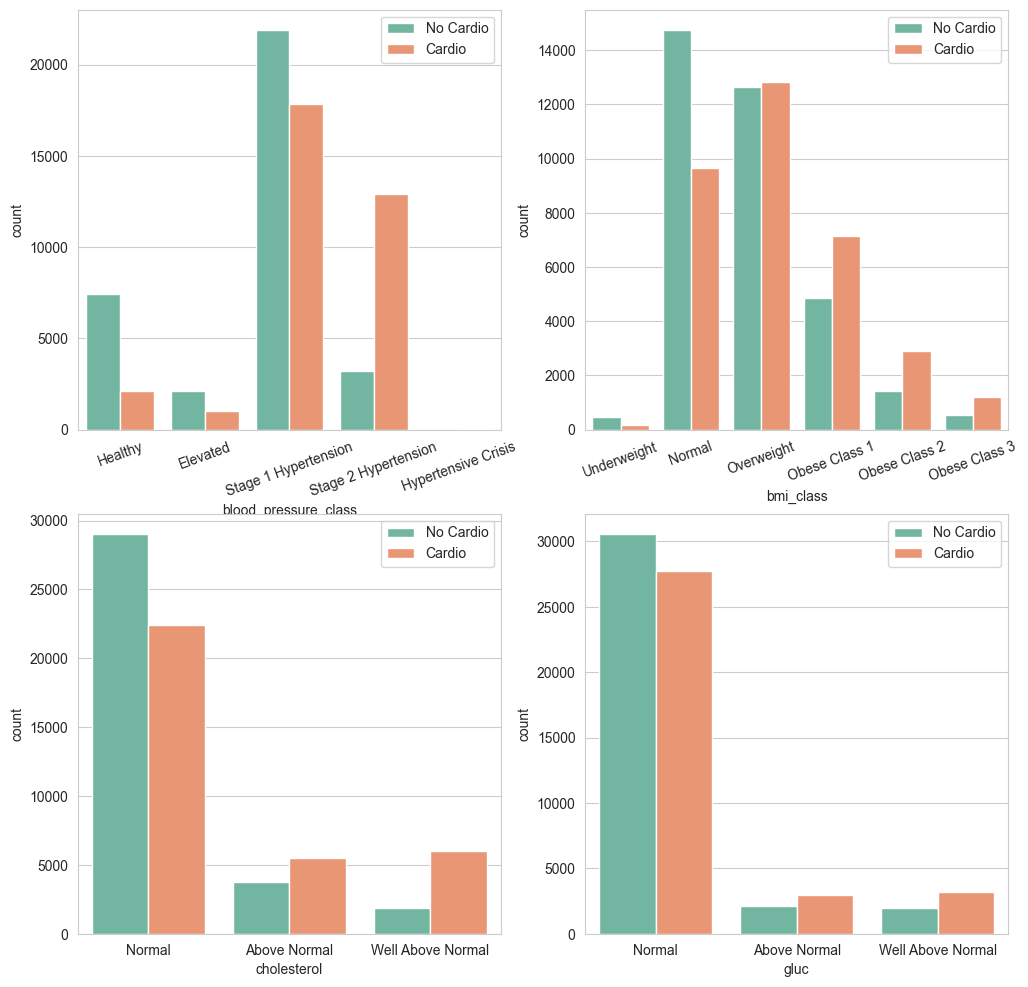

In [205]:
# create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
# plot the different blood pressure classes against the share of people with cardio disease
classes = ["Healthy", "Elevated", "Stage 1 Hypertension", "Stage 2 Hypertension", "Hypertensive Crisis"]
sns.countplot(x="blood_pressure_class", hue="cardio", data=cardio, ax=axes[0, 0], palette="Set2", order=classes)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=20)
axes[0, 0].legend(["No Cardio", "Cardio"])

# in the second subplot plot the different bmi classes against the share of people with cardio disease
classes = ["Underweight", "Normal", "Overweight", "Obese Class 1", "Obese Class 2", "Obese Class 3"]
sns.countplot(x="bmi_class", hue="cardio", data=cardio, ax=axes[0, 1], palette="Set2", order=classes)
axes[0, 1].legend(["No Cardio", "Cardio"])
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=20)
# in the third subplot plot the different cholesterol classes against the share of people with cardio disease
sns.countplot(x="cholesterol", hue="cardio", data=cardio, ax=axes[1, 0], palette="Set2")
axes[1, 0].legend(["No Cardio", "Cardio"])
axes[1,0].set_xticklabels(["Normal", "Above Normal", "Well Above Normal"])
# in the fourth subplot plot the different glucose classes against the share of people with cardio disease
sns.countplot(x="gluc", hue="cardio", data=cardio, ax=axes[1, 1], palette="Set2")
axes[1, 1].legend(["No Cardio", "Cardio"])
axes[1,1].set_xticklabels(["Normal", "Above Normal", "Well Above Normal"])
plt.show()




C:\Users\kalls\AppData\Local\Temp\ipykernel_9956\1369928657.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cardio.corr(), annot=True, cmap="RdYlGn")


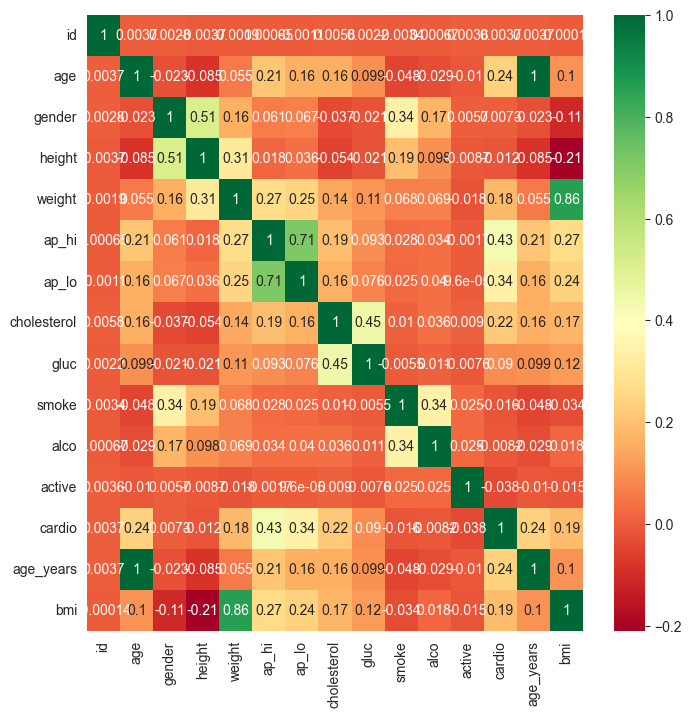

In [206]:
# create a heatmap with the correlation between the different variables
plt.figure(figsize=(8, 8))
sns.heatmap(cardio.corr(), annot=True, cmap="RdYlGn")
plt.show()


#### The strongest correlations (that is not the same feature) are between (In descending order):
- Weight to bmi
###### Reason: since you use the weight directly to calculate the bmi the correlation is self explanatory
- height to gender
###### Reason: this correlation is also very easy to explain. When you look at the males in the dataset, the avarage length is higher than for the females.
- ap_hi to ap_lo
###### Reason: Seeing as both ap_hi and ap_lo are meassures of your blood preassure, it's not surprising that they are correlated. 
- ap_hi to cardio
###### Reason: High systolic blood pressure places increased stress on the blood vessels and heart, causing damage to the arteries and blood vessels over time, increasing the risk of heart disease, heart attacks, and strokes.

In [207]:
# create a copy of the dataframe
cardio_copy = cardio.copy()
# drop the ap_hi, ap_lo, weight, height and bmi columns
cardio_copy.drop(["ap_hi", "ap_lo", "weight", "height", "bmi"], axis=1, inplace=True)
#do one hot encoding on the bmi_class, blood_pressure_class
cardio_copy = pd.get_dummies(cardio_copy, columns=["bmi_class", "blood_pressure_class", "gender"])

In [208]:
cardio_copy

,id,age,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi_class_Normal,...,bmi_class_Obese Class 3,bmi_class_Overweight,bmi_class_Underweight,blood_pressure_class_Elevated,blood_pressure_class_Healthy,blood_pressure_class_Hypertensive Crisis,blood_pressure_class_Stage 1 Hypertension,blood_pressure_class_Stage 2 Hypertension,gender_1,gender_2
0,0,18393,1,1,0,0,1,0,50.391781,1,...,0,0,0,0,0,0,1,0,0,1
1,1,20228,3,1,0,0,1,1,55.419178,0,...,0,0,0,0,0,0,0,1,1,0
2,2,18857,3,1,0,0,0,1,51.663014,1,...,0,0,0,0,0,0,1,0,1,0
3,3,17623,1,1,0,0,1,1,48.282192,0,...,0,1,0,0,0,0,0,1,0,1
4,4,17474,1,1,0,0,0,0,47.873973,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,1,1,1,0,1,0,52.712329,0,...,0,1,0,0,0,0,1,0,0,1
69996,99995,22601,2,2,0,0,1,1,61.920548,0,...,1,0,0,0,0,0,0,1,1,0
69997,99996,19066,3,1,0,1,0,1,52.235616,0,...,0,0,0,0,0,0,0,1,0,1
69998,99998,22431,1,2,0,0,0,1,61.454795,0,...,0,1,0,0,0,0,1,0,1,0


In [221]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
#import train test split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [209]:
# on the cardio dataframe, remove bmi_class, blood_pressure_class, height and weight
cardio.drop(["bmi_class", "blood_pressure_class", "height", "weight"], axis=1, inplace=True)

In [210]:
# do one hot encoding on gender
cardio = pd.get_dummies(cardio, columns=["gender"], drop_first=True)
X, y = cardio.drop("cardio", axis=1), cardio.cardio

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [219]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [220]:
y_pred = model_rf.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [223]:
param_grid = {"n_estimators": [100, 150, 200, 300],
              "criterion": ["gini", "entropy"],
              "max_features": ["auto", "sqrt", "log2"]}
clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=1, scoring="recall", n_jobs=-1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='recall', verbose=1)

In [224]:
clf.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 300}

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      6894
           1       0.73      0.69      0.71      6826

    accuracy                           0.72     13720
   macro avg       0.72      0.72      0.72     13720
weighted avg       0.72      0.72      0.72     13720



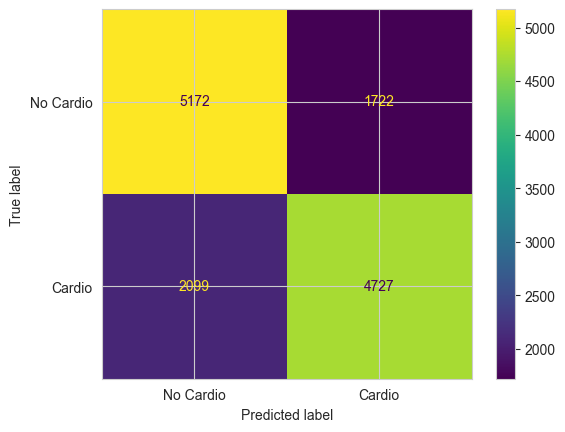

In [226]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_classification(y_test, y_pred, labels=["No Cardio", "Cardio"]):
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    plt.show()
evaluate_classification(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      6894
           1       0.74      0.69      0.71      6826

    accuracy                           0.72     13720
   macro avg       0.72      0.72      0.72     13720
weighted avg       0.72      0.72      0.72     13720



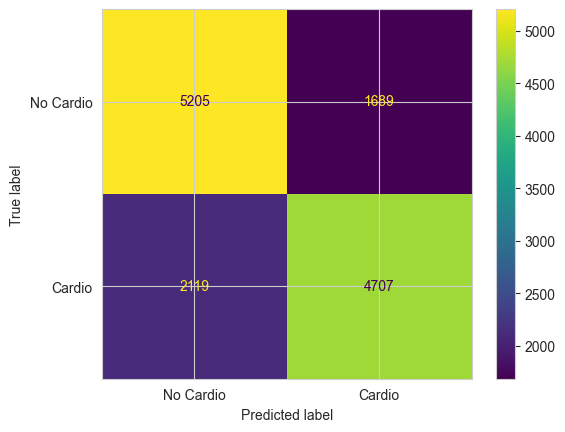

In [227]:
y_pred_tuned = clf.predict(X_test)
evaluate_classification(y_test, y_pred_tuned)

In [228]:
model_rf.feature_importances_, model_rf.feature_importances_.sum()

(array([0.1634736 , 0.17032992, 0.17316997, 0.07073819, 0.0360004 ,
        0.01447079, 0.00812578, 0.00663112, 0.01141684, 0.16394741,
        0.16607988, 0.01561609]),
 1.0)

<AxesSubplot: xlabel='importance', ylabel='feature'>

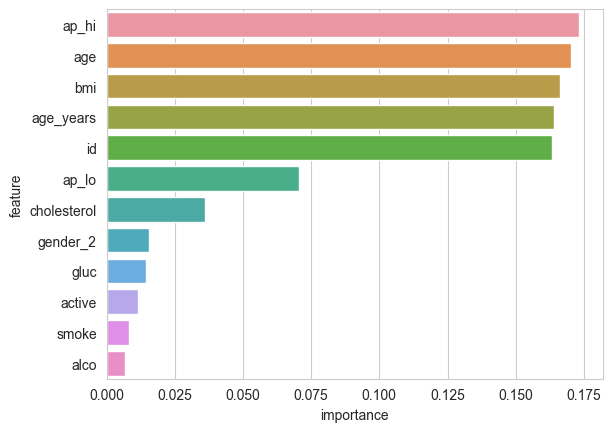

In [229]:
feature_importances = pd.DataFrame({"feature": X_train.columns, "importance": model_rf.feature_importances_})
feature_importances.columns = ["feature", "importance"]
feature_importances.sort_values(by="importance", ascending=False, inplace=True)
sns.barplot(x="importance", y="feature", data=feature_importances)